In [17]:
import cv2
import matplotlib.pyplot as plt
import torch
from PIL import Image
from transformers import AutoTokenizer, ViTImageProcessor, VisionEncoderDecoderModel, GPT2TokenizerFast

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [11]:
vit_model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
vit_feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
vit_tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
vit_model.to(device)

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "torch_dtype": "float32",
  "transformers_version": "4.49.0"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id"

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(i

In [15]:
max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def get_caption_vit(image_paths):
    images = []
    
    for image_path in image_paths:
        image = Image.open(image_path)
        if image.mode != "RGB":
          image = image.convert(mode="RGB")
        images.append(image)
    
    pixel_values = vit_feature_extractor(images=images, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)
    
    output_ids = vit_model.generate(pixel_values, **gen_kwargs)
    
    predictions = vit_tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    predictions = [prediction.strip() for prediction in predictions]
    return predictions

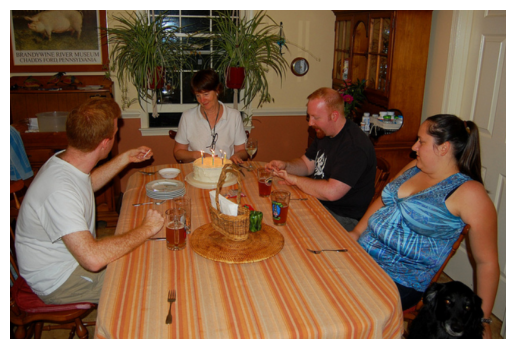

In [10]:
# Load an image using OpenCV
sample_image = cv2.imread(r"..\data\sample\sample_image_1.png")

# Convert BGR to RGB (since OpenCV loads images in BGR format)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(sample_image)
plt.axis("off")  # Hide axis
plt.show()

In [16]:
get_caption_vit([r"..\data\sample\sample_image_1.png"])

['people sitting around a table with a cake on it']

In [18]:
# load the fine-tuned image captioning model and corresponding tokenizer and image processor
swin_model = VisionEncoderDecoderModel.from_pretrained("Abdou/vit-swin-base-224-gpt2-image-captioning").to(device)
swin_tokenizer = GPT2TokenizerFast.from_pretrained("Abdou/vit-swin-base-224-gpt2-image-captioning")
swin_image_processor = ViTImageProcessor.from_pretrained("Abdou/vit-swin-base-224-gpt2-image-captioning")

Config of the encoder: <class 'transformers.models.swin.modeling_swin.SwinModel'> is overwritten by shared encoder config: SwinConfig {
  "_name_or_path": "microsoft/swin-base-patch4-window7-224-in22k",
  "architectures": [
    "SwinForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "depths": [
    2,
    2,
    18,
    2
  ],
  "drop_path_rate": 0.1,
  "embed_dim": 128,
  "encoder_stride": 32,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": 224,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-05,
  "mlp_ratio": 4.0,
  "model_type": "swin",
  "num_channels": 3,
  "num_heads": [
    4,
    8,
    16,
    32
  ],
  "num_layers": 4,
  "out_features": [
    "stage4"
  ],
  "out_indices": [
    4
  ],
  "patch_size": 4,
  "path_norm": true,
  "qkv_bias": true,
  "stage_names": [
    "stem",
    "stage1",
    "stage2",
    "stage3",
    "stage4"
  ],
  "torch_dtype": "float32",
  "transformers_version": "4.49.0",
  "use_abso

generation_config.json:   0%|          | 0.00/179 [00:00<?, ?B/s]

C:\Users\Weiye\anaconda3\envs\dsa5204-project\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Weiye\.cache\huggingface\hub\models--Abdou--vit-swin-base-224-gpt2-image-captioning. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [20]:
def get_caption_swin(image_path):
    image = Image.open(image_path)
    # preprocess the image
    img = swin_image_processor(image, return_tensors="pt").to(device)
    # generate the caption (using greedy decoding by default)
    output = swin_model.generate(**img)
    # decode the output
    caption = swin_tokenizer.batch_decode(output, skip_special_tokens=True)[0]
    return caption

In [22]:
get_caption_swin(r"..\data\sample\sample_image_1.png")

'A group of people sitting around a table eating cake.'